In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_data = pd.read_csv('titanic_train.csv')
test_data = pd.read_csv('titanic_test.csv')

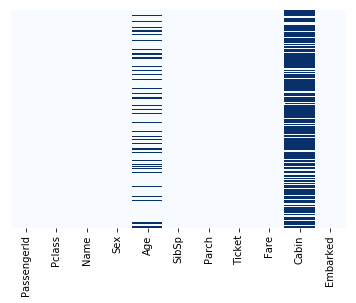

In [3]:
sns.heatmap(test_data.isnull(),yticklabels = False,cbar = False, cmap = 'Blues')

In [4]:
# sns.set_style('whitegrid')

In [5]:
# sns.countplot(x = 'Survived', hue ='Pclass' , data =  raw_data)


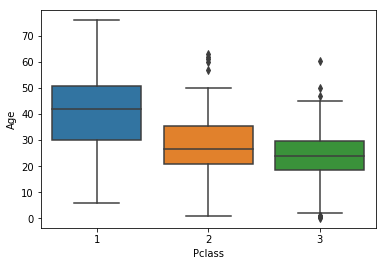

In [6]:
sns.boxplot(x='Pclass',y='Age',data = test_data)

In [7]:
raw_data.drop('Cabin', axis = 1, inplace  = True)
test_data.drop('Cabin', axis = 1, inplace = True)


In [8]:
new_raw= pd.DataFrame()
groups = raw_data.groupby(['Pclass'])
c=[]
for name,group in groups:
    c.append(group['Age'].mean())
    group['Age'] = group['Age'].fillna(group['Age'].mean())
    new_raw = pd.concat((new_raw, group), axis = 0)

/home/rajesh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
test_data.shape

(418, 10)

In [10]:
def Age_fill(features):
    global c
    Age = features[0]
    Pclass = features[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return c[0]
        elif Pclass == 2:
            return c[1]
        elif Pclass == 3:
            return c[2]
    else:
        return Age

In [11]:
test_data['Age'] = test_data[['Age','Pclass']].apply(Age_fill, axis = 1)

In [12]:
def Sex_fill(cols):
    Sex = cols[0]
    if Sex == 'male':
        return 1
    else:
        return 0

In [13]:
test_data['Sex'] = test_data[['Sex']].apply(Sex_fill, axis = 1)

In [14]:
new_raw['Sex'] = new_raw[['Sex']].apply(Sex_fill, axis = 1)

In [15]:
embark_train = pd.get_dummies(new_raw['Embarked'], drop_first = True)


In [16]:
embark_test = pd.get_dummies(test_data['Embarked'], drop_first = True)

In [17]:
train = pd.concat([new_raw  , embark_train],axis =1)
test  = pd.concat([test_data , embark_test],axis =1)

In [18]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,0,0


In [19]:
# train = train.drop(train.columns[[0,3,8,10]],axis = 1)
test  = test.drop(test.columns[[0,2,7,9]],axis = 1)
test.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,1,34.5,0,0,7.8292,1,0


In [20]:
train = train[[u'Pclass', u'Sex', u'Age', u'SibSp', u'Parch', u'Fare',  u'Q', u'S',u'Survived']]
test = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',  'Q', 'S']]
# print train.head(1)
# print test.head(1)

In [21]:
X_train = train.drop('Survived', axis =1)
y_train = train['Survived']
X_test =  test

In [22]:
Fare_mean = X_test['Fare'].mean()

In [23]:
def Fare_fill(cols):
    global Fare_mean
    Fare = cols[0]
    if pd.isnull(Fare):
        return Fare_mean
    else:
        return Fare

In [24]:
X_test['Fare'] = X_test[['Fare']].apply(Fare_fill,axis = 1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), train['Survived'], test_size=0.30,random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
LogModel = LogisticRegression()

In [29]:
LogModel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
# X_test['Fare'].tail(-10)
Predictions = LogModel.predict(X_test)

In [34]:
Predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,Predictions))

NameError: name 'y_test' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,Predictions))